In [19]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [20]:
X,y  = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

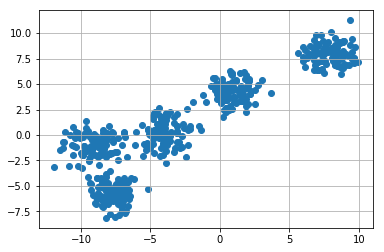

In [21]:
plt.figure(0)
plt.grid()
plt.scatter(X[:,0],X[:,1])
plt.show()

In [38]:

k = 5

color  = ["pink","red","blue","yellow","orange"]

clusters = {}

for i in range(k):
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    #print(center)
    
    cluster = {
        'center':center,
        'points':points,
        'color': color[i]
        }
    
    clusters[i] = cluster
print(clusters)

{0: {'center': array([0.51618102, 3.97705575]), 'points': [], 'color': 'pink'}, 1: {'center': array([ 7.74575039, -2.15954331]), 'points': [], 'color': 'red'}, 2: {'center': array([-0.68851915,  4.26371211]), 'points': [], 'color': 'blue'}, 3: {'center': array([1.88231273, 2.78385937]), 'points': [], 'color': 'yellow'}, 4: {'center': array([4.7104859 , 2.47190905]), 'points': [], 'color': 'orange'}}


In [39]:
clusters

{0: {'center': array([0.51618102, 3.97705575]), 'points': [], 'color': 'pink'},
 1: {'center': array([ 7.74575039, -2.15954331]),
  'points': [],
  'color': 'red'},
 2: {'center': array([-0.68851915,  4.26371211]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([1.88231273, 2.78385937]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([4.7104859 , 2.47190905]),
  'points': [],
  'color': 'orange'}}

In [40]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [41]:
def assignPointToClusters(clusters):  #E-step
    for ix in range(X.shape[0]):
        dist=[]
        curr_x=X[ix]   #current point

        for kx in range(k):
            d=distance(curr_x,clusters[kx]['center'])

            dist.append(d)
        current_cluster=np.argmin(dist)

        clusters[current_cluster]['points'].append(curr_x)

In [42]:
print(X.shape[0])

500


In [43]:
def updateClusters(clusters):    #M-Step
    
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        
        if(pts.shape[0]>0):
            new_u=pts.mean(axis=0)
            
            clusters[kx]['center']=new_u
            clusters[kx]['points']=[]  #clear the list


In [44]:
def plotClusters(clusters):
    
    for kx in range(k):
        #print(len(clusters[kx]['points']))
        
        pts=np.array(clusters[kx]['points'])
        
        #print(pts)
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
            
        except:
            pass
        
        uk=clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color="black",marker="*")
        
        
        

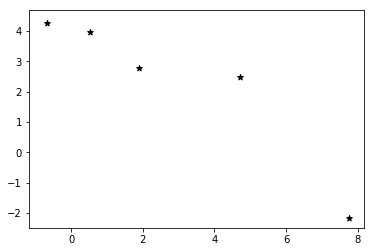

In [45]:
plotClusters((clusters))

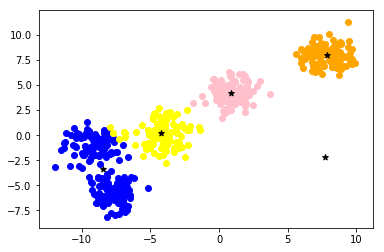

In [57]:


assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)